# Neuron Tutorial - Modeling Exercises - Class 3
## March 14, 2024

## Recap from last class: 

We learned: 

    1. basics about Neuron + Python interface 
    
    2. how to add point processes
    
    3. how to record data
    
    4. how to import an external module
    
    5. how to find a particular segment or the location of the electrode 
    
    6. how to move the electrode  (.loc)

## Plan for today:

1. Some more exercises: Hodgkin-Huxley, inserting multiple current clamps and calculating ISI

2. Learn how to specify geometry and how to visualize information

3. Build an artificial neural model, multi-compartment - learn how to connect different sections

### Exercise 1: insert Hodgkin Huxley at soma and inject a current 

In [ ]:
from neuron import h, gui
from matplotlib import pyplot

Create a soma section: 

In [ ]:
soma = h.Section(name='soma')
soma.insert('hh')

Insert a current clamp at the center of the soma, that starts at t = 2 msec of duration 0.5 msec and of amplitude 50. 

In [ ]:
ic = h.IClamp(soma(0.5))
ic.delay = 2 
ic.dur = 0.5
ic.amp = 50

Record time and membrane potential: 

In [ ]:
t = h.Vector()
v = h.Vector()

t.record(h._ref_t)
v.record(soma(0.5)._ref_v)


Initialize and run:

In [ ]:
h.finitialize(-65)
h.continuerun(50)

Plot your results using pyplot:

In [ ]:
pyplot.plot(t,v)
pyplot.show

Before we move on please restart your kernel: 

### Exercise 2: Let's insert many currents and let's calculate the interspike intervals

In [3]:
from neuron import h, gui
from matplotlib import pyplot

In [4]:
soma = h.Section(name='soma')
soma.insert('hh')

soma

In [5]:
ics = []
for t in [2,10,20,40]:
    i =h.IClamp(soma(0.5))
    i.delay = t 
    i.dur = 0.5
    i.amp = 50
    ics.append(i)

In [6]:
t = h.Vector()
v = h.Vector()

t.record(h._ref_t)
v.record(soma(0.5)._ref_v)

Vector[4]

In [7]:
h.finitialize(-65)
h.continuerun(50)

0.0

In [8]:
st = [t[j] for j in range(len(v)-1)
      if v[j]<=0 and v[j+1] >0]
print('spike times:'); print(st)

spike times:
[3.1750000000000114, 21.174999999999333, 41.12500000000079]


<function matplotlib.pyplot.show(close=None, block=None)>

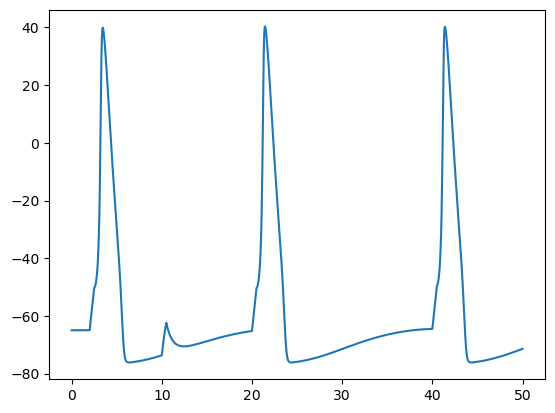

In [9]:
pyplot.plot(t,v)
pyplot.show

**Questions:** 
1. Why don't we have a spike around t=10? 

2. How do we calculate the interspike intervals (differences between two consecutive spikes)? 

In [10]:
isi = [next - last for next, last in zip(st[1:],st[:-1])]

In [11]:
print('ISI:')
print(isi)

ISI:
[17.99999999999932, 19.950000000001456]
